In [2]:
import pandas as pd
import os

In [3]:
os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver2.0/data_modelos_dummys2.0')
data = pd.read_csv('modelo_supervisado_2.0.csv')

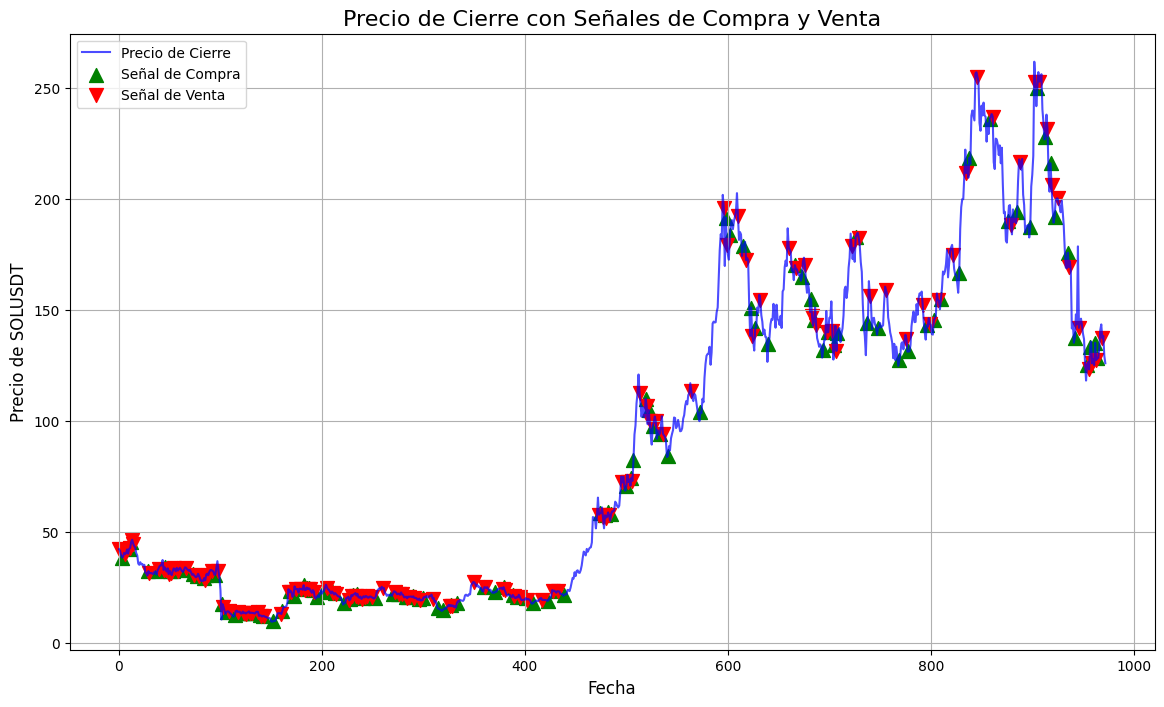

In [4]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(data['close'], label='Precio de Cierre', color='blue', alpha=0.7)

# Añadir señales de compra y venta
plt.scatter(data.index[data['buy_signal'] == 1], data['close'][data['buy_signal'] == 1], 
            marker='^', color='green', label='Señal de Compra', alpha=1, s=100)
plt.scatter(data.index[data['sell_signal'] == 1], data['close'][data['sell_signal'] == 1], 
            marker='v', color='red', label='Señal de Venta', alpha=1, s=100)

# Personalización del gráfico
plt.title('Precio de Cierre con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel(f'Precio de {'SOLUSDT'}', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar los datos
df = data.copy()

# Definir las columnas predictoras y la variable objetivo
features = ['open', 'value', 'rsi', 'macd', 'adx', 'adp', 'adm', 'dri',
            'dlogri', 'avgtr', 'donch_hband', 'donch_lband', 'vwap']
target = 'signals'

# Separar variables predictoras y objetivo
X = df[features]
y = df[target]

# Convertir las etiquetas de 'signals' a valores numéricos (buy=0, hold=1, sell=2)
y = y.map({'buy': 0, 'hold': 1, 'sell': 2})

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir la arquitectura DeepFM utilizando Keras
input_dim = X_train.shape[1]
embedding_dim = 10  # Tamaño de los embeddings de las características

inputs = layers.Input(shape=(input_dim,))
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)  # 3 clases: 'buy', 'hold', 'sell'

model = models.Model(inputs=inputs, outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir probabilidades a clases

accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_classes))



Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6915 - loss: 0.8661 - val_accuracy: 0.7466 - val_loss: 0.7500
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.7061 - val_accuracy: 0.7500 - val_loss: 0.7117
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7497 - loss: 0.6731 - val_accuracy: 0.7534 - val_loss: 0.6778
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7476 - loss: 0.6093 - val_accuracy: 0.7534 - val_loss: 0.6520
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7668 - loss: 0.5574 - val_accuracy: 0.7432 - val_loss: 0.6346
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7763 - loss: 0.5359 - val_accuracy: 0.7500 - val_loss: 0.6208
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7773 - loss: 0.5194 - val_accuracy: 0.7534 - val_loss: 0.6142
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7558 - loss: 0.5178 - val_accuracy: 0.7500 - val_loss

In [ ]:
# Normalizar todo el conjunto de datos
X_scaled = scaler.transform(X)

# Hacer predicciones para todo el conjunto de datos
predictions = model.predict(X_scaled)

# Convertir las probabilidades a las clases predichas (índice de la clase con mayor probabilidad)
df['predictions'] = np.argmax(predictions, axis=1)

# Comparar las predicciones con la variable objetivo real
df[['signals', 'predictions']].head(20)  # Muestra las primeras 20 filas



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,signals,predictions
0,sell,2
1,hold,1
2,hold,2
3,buy,1
4,hold,1
5,hold,1
6,sell,1
7,hold,1
8,hold,1
9,hold,2


In [10]:
from sklearn.metrics import confusion_matrix

# Mapeo de clases de texto a números (por ejemplo, 'buy' -> 0, 'hold' -> 1, 'sell' -> 2)
class_mapping = {'buy': 0, 'hold': 1, 'sell': 2}

# Aplicar el mapeo a la columna 'signals' y 'predictions'
df['signals'] = df['signals'].map(class_mapping)
df['predictions'] = df['predictions'].astype(int)  # Asegúrate de que las predicciones sean enteros

# Matriz de confusión
cm = confusion_matrix(df['signals'], df['predictions'])
print(cm)


[[ 49  73   0]
 [ 24 683  21]
 [  1  87  35]]


In [11]:
df['correcto'] = df['signals'] == df['predictions']
df[['signals', 'predictions', 'correcto']].head(20)


,signals,predictions,correcto
0,2,2,True
1,1,1,True
2,1,2,False
3,0,1,False
4,1,1,True
5,1,1,True
6,2,1,False
7,1,1,True
8,1,1,True
9,1,2,False


In [12]:
import numpy as np


# Si 'predicted_signals' está en df, haz lo siguiente:
df['buy_signal_pred'] = np.where(df['predictions'] == 0, 1, 0)
df['sell_signal_pred'] = np.where(df['predictions'] == 2, 1, 0)

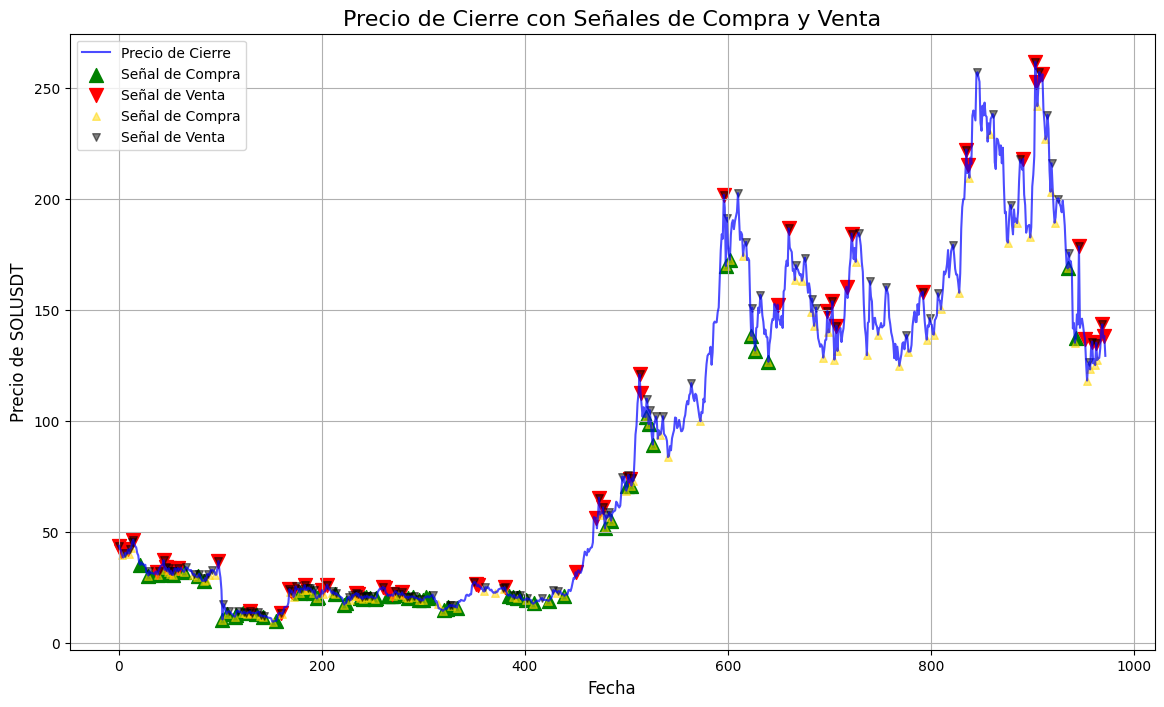

In [13]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df['open'], label='Precio de Cierre', color='blue', alpha=0.7)

# Añadir señales de compra y venta
plt.scatter(df.index[df['buy_signal_pred'] == 1], df['open'][df['buy_signal_pred'] == 1], 
            marker='^', color='green', label='Señal de Compra', alpha=1, s=100)
plt.scatter(df.index[df['sell_signal_pred'] == 1], df['open'][df['sell_signal_pred'] == 1], 
            marker='v', color='red', label='Señal de Venta', alpha=1, s=100)
plt.scatter(df.index[df['buy_signal'] == 1], df['open'][df['buy_signal'] == 1], 
            marker='^', color='gold', label='Señal de Compra', alpha=0.5, s=30)
plt.scatter(df.index[df['sell_signal'] == 1], df['open'][df['sell_signal'] == 1], 
            marker='v', color='black', label='Señal de Venta', alpha=0.5, s=30)

# Personalización del gráfico
plt.title('Precio de Cierre con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel(f'Precio de {'SOLUSDT'}', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()

Compra a 35.265 en 21/08/2022
Venta a 32.145 en 06/09/2022 | ROI: -8.85%
Compra a 30.865 en 07/09/2022
Venta a 37.415 en 13/09/2022 | ROI: 21.22%
Compra a 32.96 en 14/09/2022
Venta a 34.11 en 15/09/2022 | ROI: 3.49%
Compra a 32.235 en 17/09/2022
Venta a 33.67 en 18/09/2022 | ROI: 4.45%
Compra a 31.07 en 19/09/2022
Venta a 32.605 en 20/09/2022 | ROI: 4.94%
Compra a 30.625 en 22/09/2022
Venta a 33.86 en 27/09/2022 | ROI: 10.56%
Compra a 32.055 en 03/10/2022
Venta a 36.895 en 06/11/2022 | ROI: 15.10%
Compra a 10.61 en 10/11/2022
Venta a 14.29 en 07/12/2022 | ROI: 34.68%
Compra a 13.31 en 13/12/2022
Venta a 13.485 en 07/01/2023 | ROI: 1.31%
Compra a 22.775 en 25/01/2023
Venta a 26.08 en 30/01/2023 | ROI: 14.51%
Compra a 23.905 en 01/02/2023
Venta a 23.865 en 16/02/2023 | ROI: -0.17%
Compra a 21.882 en 01/03/2023
Venta a 22.534 en 22/03/2023 | ROI: 2.98%
Compra a 20.408 en 26/03/2023
Venta a 25.361 en 17/04/2023 | ROI: 24.27%
Compra a 21.251 en 22/04/2023
Venta a 21.92 en 26/04/2023 | ROI: 

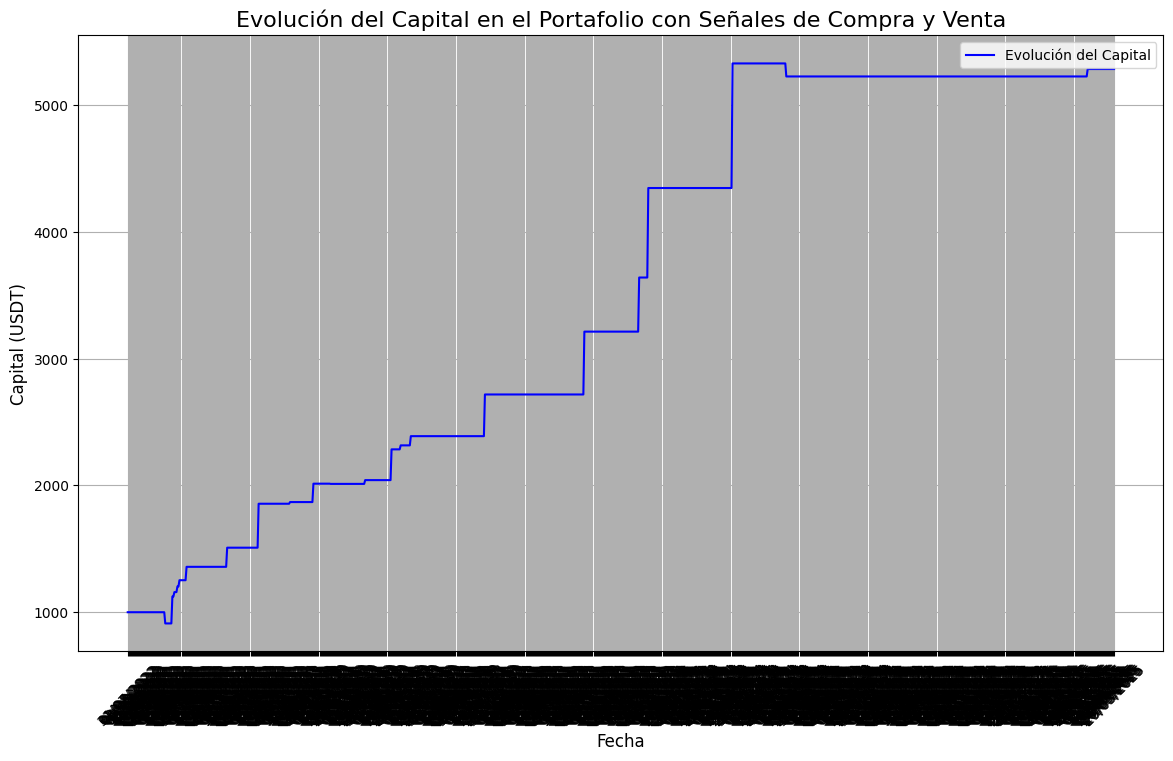

In [14]:
import pandas as pd

# Crear una copia del DataFrame
df_validation = df.copy()

# Inicializar las variables
capital_inicial = 1000  # Ejemplo de inversión inicial en USDT
capital = capital_inicial  # Capital actualizado durante las operaciones
buy_price = 0  # Precio al que se compró el activo
holding = False  # Estado de si se tiene una posición abierta

# Listas para almacenar resultados
capital_history = []  # Historial del capital a lo largo del tiempo
buy_prices = []  # Historial de precios de compra
sell_prices = []  # Historial de precios de venta

# Iterar a través de las filas del DataFrame
for index, row in df_validation.iterrows():
    # Señal de compra
    if row['buy_signal_pred'] == 1 and not holding:
        buy_price = row['open']
        holding = True  # Se abre la posición
        buy_prices.append(buy_price)
        print(f"Compra a {buy_price} en {df_validation['date'][index]}")
    
    # Señal de venta
    elif row['sell_signal_pred'] == 1 and holding:
        sell_price = row['open']
        roi = (sell_price - buy_price) / buy_price  # Cálculo del ROI
        capital += capital_inicial * roi  # Actualización del capital
        sell_prices.append(sell_price)
        holding = False  # Se cierra la posición
        print(f"Venta a {sell_price} en {df_validation['date'][index]} | ROI: {roi*100:.2f}%")
    
    capital_history.append(capital)  # Guardar capital actual

# Imprimir el capital final
print(f"Capital final: {capital:.2f} USDT")

# Opcional: Crear un DataFrame para visualizar el historial de capital
df_validation_capital = pd.DataFrame({
    'Date': df_validation['date'],
    'Capital': capital_history
})

# Graficar la evolución del capital a lo largo del tiempo
plt.figure(figsize=(14, 8))
plt.plot(df_validation_capital['Date'], df_validation_capital['Capital'], label='Evolución del Capital', color='blue')
plt.title('Evolución del Capital en el Portafolio con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Capital (USDT)', fontsize=12)
plt.grid(True)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()


Capital Final: 1949.45 USDT
Tasa de Retorno Acumulado: 94.95%
Volatilidad Anualizada: 0.8915
Relación de Sharpe: -0.0082
Drawdown Máximo: -42.99%


C:\Users\POZOLE\AppData\Local\Temp\ipykernel_7600\161241951.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


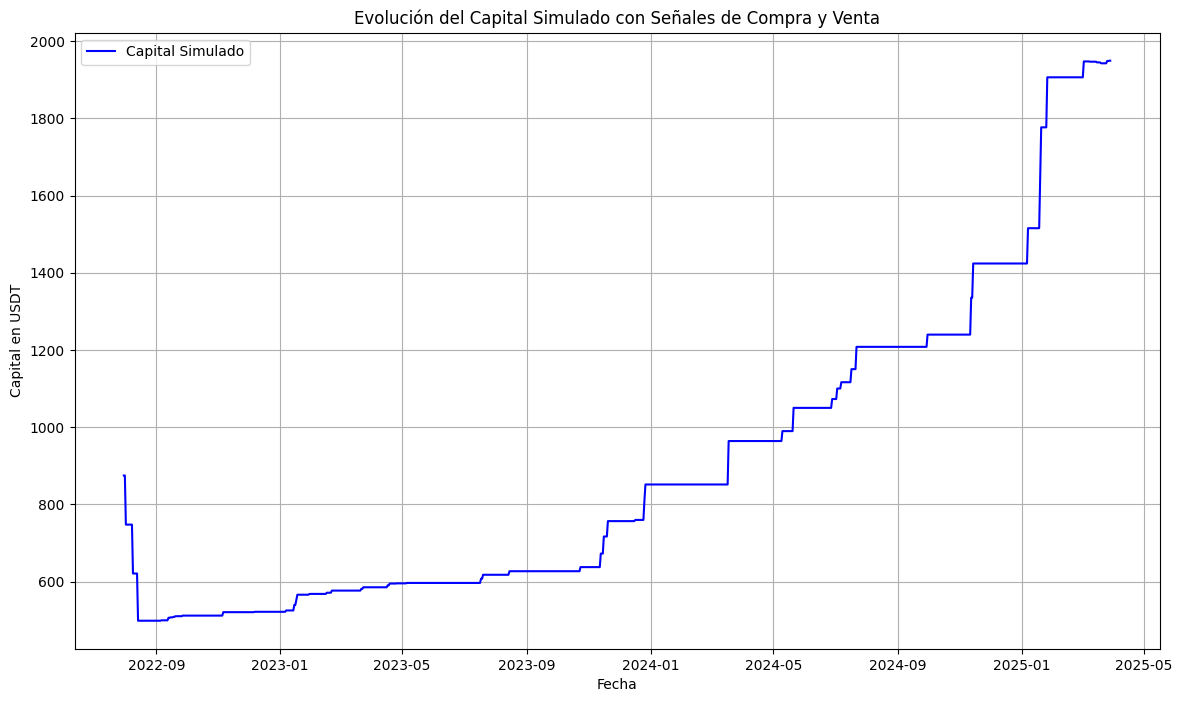

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Supongamos que tienes los datos necesarios con las señales predichas
# Aquí se toma el dataframe 'df' con las señales de compra y venta predichas

# Asegúrate de que las fechas estén en el formato correcto
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

# Calcula el retorno diario en base al precio 'open'
df['daily_return'] = df['open'].pct_change()

# Calcula el retorno acumulado de la inversión
initial_capital = 1000  # Capital inicial
df['capital'] = initial_capital * (1 + df['daily_return']).cumprod()

# Añadir señales de compra y venta al DataFrame
df['buy_signal'] = df['buy_signal_pred'] == 1
df['sell_signal'] = df['sell_signal_pred'] == 1

# Simular las compras y ventas
capital = initial_capital
capital_series = []

for i in range(len(df)):
    if df['buy_signal'].iloc[i]:
        buy_price = df['open'].iloc[i]
    if df['sell_signal'].iloc[i]:
        sell_price = df['open'].iloc[i]
        capital += (sell_price - buy_price)  # Calcular el retorno de la venta
    capital_series.append(capital)

df['capital_simulado'] = capital_series

# 1. Calcular el Drawdown
df['capital_max'] = df['capital_simulado'].cummax()
df['drawdown'] = df['capital_simulado'] - df['capital_max']
df['drawdown_pct'] = df['drawdown'] / df['capital_max'] * 100

# 2. Calcular la volatilidad (desviación estándar de los retornos diarios)
volatilidad = df['daily_return'].std() * np.sqrt(252)  # Volatilidad anualizada

# 3. Calcular la rentabilidad diaria promedio
rentabilidad_diaria = df['daily_return'].mean()

# 4. Calcular la relación de Sharpe
tasa_libre_riesgo = 0.01  # Asumimos una tasa libre de riesgo del 1%
sharpe_ratio = (rentabilidad_diaria - tasa_libre_riesgo) / volatilidad

# 5. Resultado Final
capital_final = df['capital_simulado'].iloc[-1]
tasa_retorno_acumulado = (capital_final - initial_capital) / initial_capital * 100

# Imprimir métricas de desempeño
print(f"Capital Final: {capital_final:.2f} USDT")
print(f"Tasa de Retorno Acumulado: {tasa_retorno_acumulado:.2f}%")
print(f"Volatilidad Anualizada: {volatilidad:.4f}")
print(f"Relación de Sharpe: {sharpe_ratio:.4f}")
print(f"Drawdown Máximo: {df['drawdown_pct'].min():.2f}%")

# Graficar la evolución del capital simulado
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['capital_simulado'], label='Capital Simulado', color='blue')
plt.title('Evolución del Capital Simulado con Señales de Compra y Venta')
plt.xlabel('Fecha')
plt.ylabel('Capital en USDT')
plt.grid(True)
plt.legend()
plt.show()


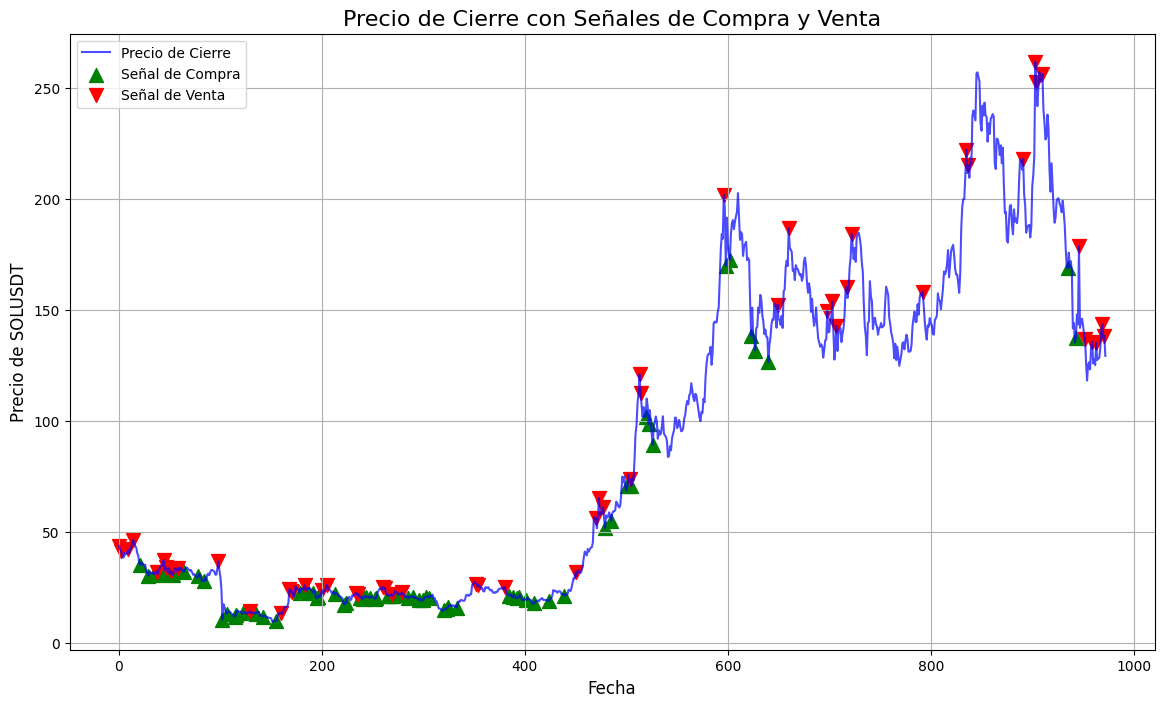

In [16]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df['open'], label='Precio de Cierre', color='blue', alpha=0.7)

# Añadir señales de compra y venta
plt.scatter(df.index[df['buy_signal_pred'] == 1], df['open'][df['buy_signal_pred'] == 1], 
            marker='^', color='green', label='Señal de Compra', alpha=1, s=100)
plt.scatter(df.index[df['sell_signal_pred'] == 1], df['open'][df['sell_signal_pred'] == 1], 
            marker='v', color='red', label='Señal de Venta', alpha=1, s=100)

# Personalización del gráfico
plt.title('Precio de Cierre con Señales de Compra y Venta', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel(f'Precio de {'SOLUSDT'}', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()